In [1]:
import numpy as np, local, plottools as pl, healpy as hp, curvedsky as cs, tools_cmb, tools_lens, tools_multitracer as mass, binning, tqdm
from matplotlib.pyplot import *

In [2]:
kwargs_cmb  = {\
    't':'id', \
    'fltr':'none', \
}
kwargs_qrec = {\
    'qlist':['EB'], \
    'rlmin':200, \
    'rlmax':1024, \
    'olmax':1024, \
    'nside':512, \
}
kwargs_mass = {\
    'add_cmb':['EB'], \
    #'add_cmb':[], \
    'add_gal':np.arange(3), \
    'add_cib':True, \
    #'add_gal':[], \
    #'add_cib':False, \
    'lmax':2048, \
}

In [3]:
glob = local.analysis()
cobj = tools_cmb.cmb_anisotropies(t='id')
qobj = tools_lens.interface(kwargs_cmb=kwargs_cmb,kwargs_qrec=kwargs_qrec)
mobj = mass.mass_tracer(qobj,**kwargs_mass)

loading TT/EE/BB/TE from pre-computed spectrum: ../data/lensing/cmb/aps//mcl_idcom_white_fullsky_a0.0deg_o.dat


In [4]:
cl, xl = {}, {}
iklm = local.load_input_kappa( 1, glob, mobj.lmax )
kk = cs.utils.alm2cl(mobj.lmax,iklm)
alms = mass.load_mass_tracers( 1, qobj, mobj )
for k, n in mobj.klist.items():
    cl[k] = cs.utils.alm2cl(mobj.lmax,alms[n,:,:])
    xl[k] = cs.utils.alm2cl(mobj.lmax,alms[n,:,:],iklm)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


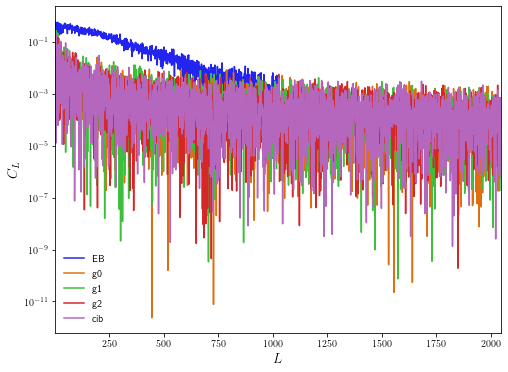

In [5]:
pl.plot_1dstyle(usetex=True,fsize=[8,6],xmin=1,xmax=2048,ylog=True,xlab=r'$L$')
for k, n in mobj.klist.items():
    #plot(cl[n],label=k)
    plot(xl[k]**2/kk/cl[k],label=k)
legend(loc=0)

In [6]:
CL = {}
for clid in ['gg','kg','Ig','kk','II','kI']:
    CL[clid] = mobj.load_mass_tracer_spectra(clid)

In [7]:
mobj.get_spectra_matrix()

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


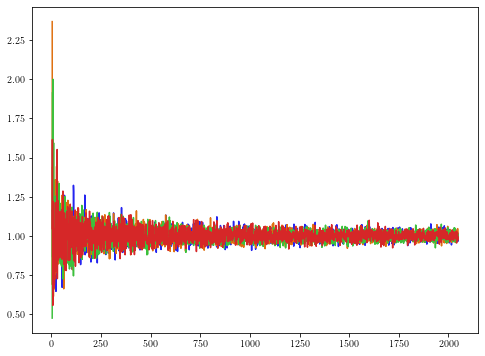

In [8]:
plot(cl['cib']/CL['II'][0])
plot(cl['g0']/CL['gg'][0])
plot(cl['g1']/CL['gg'][1])
plot(cl['g2']/CL['gg'][2])
legend(loc=0)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


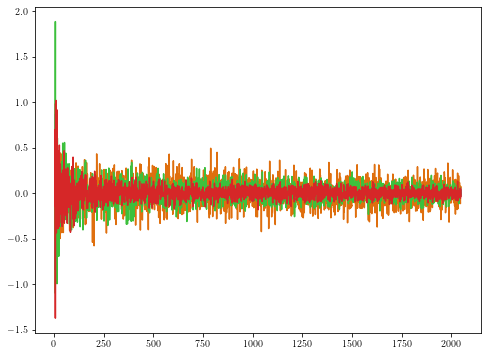

In [9]:
plot(xl['cib']/CL['kI'][0])
plot(xl['g0']/CL['kg'][0])
plot(xl['g1']/CL['kg'][1])
plot(xl['g2']/CL['kg'][2])
legend(loc=0)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
No handles with labels found to put in legend.


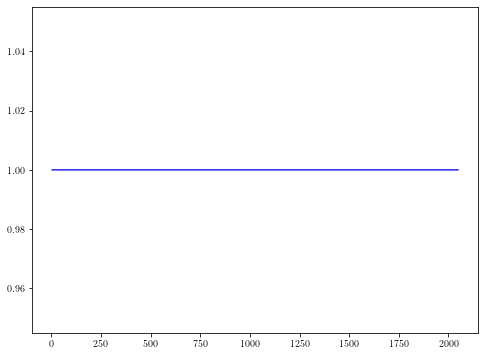

In [10]:
plot(mobj.signal_covariance[0,4,:]/CL['kI'][0])
#plot(xl['g0']/CL['kg'][0])
#plot(xl['g1']/CL['kg'][1])
#plot(xl['g2']/CL['kg'][2])
legend(loc=0)